In [29]:
# import data analysis libraries
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal
import math
# load data
data = pd.read_csv('Lab9_trial1.csv')
data

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²)
0,0.00,0.000,0.0,0.0
1,0.05,0.000,0.0,0.0
2,0.10,0.000,0.0,0.0
3,0.15,0.000,0.0,0.0
4,0.20,0.000,0.0,0.0
...,...,...,...,...
596,29.80,2.037,0.0,0.0
597,29.85,2.037,0.0,0.0
598,29.90,2.037,0.0,0.0
599,29.95,2.037,0.0,0.0


In [35]:
# set constants for measured quantities
CART_MASS = Decimal('.329') # kg
STARTING_HEIGHT = Decimal('.083') # meters
TRACK_LENGTH = Decimal('2.22') # meters

We must subtract 4cm from all of our position values to account for 
releasing our cart past where the block met the track.

In [36]:
data.iloc[:, 1] = data.iloc[:, 1].sub(.04)
data

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²),Kinetic Energy (J): 1/2mv^2,Potential Energy (J),Total Energy(J)
0,0.00,-0.080,0.0,0.0,0.0,2.727084,2.727084
1,0.05,-0.080,0.0,0.0,0.0,2.727084,2.727084
2,0.10,-0.080,0.0,0.0,0.0,2.727084,2.727084
3,0.15,-0.080,0.0,0.0,0.0,2.727084,2.727084
4,0.20,-0.080,0.0,0.0,0.0,2.727084,2.727084
...,...,...,...,...,...,...,...
596,29.80,1.957,0.0,0.0,0.0,0.269088,0.269088
597,29.85,1.957,0.0,0.0,0.0,0.269088,0.269088
598,29.90,1.957,0.0,0.0,0.0,0.269088,0.269088
599,29.95,1.957,0.0,0.0,0.0,0.269088,0.269088


The next step is creating a functions of the kinetic and potential energy of the cart in terms of our measured quantites.

In [44]:
# add column for kinetic energy: 1/2CART_MASS*col2^2
data["Kinetic Energy (J): 1/2mv^2"] = 1/2*(float(CART_MASS)*data["Latest: Velocity (m/s)"]**2)
# add column for potential energy: hmg, h = STARTING_HEIGHT/(TRACK_LENGTH)
data["Potential Energy (J)"] = float(STARTING_HEIGHT/(TRACK_LENGTH))*(float(TRACK_LENGTH) - data["Latest: Position (m)"])*float(CART_MASS)*9.81
# one more for the total energy in the system
data["Total Energy(J)"] = data["Kinetic Energy (J): 1/2mv^2"] + data["Potential Energy (J)"]
# show table
data.head(25)

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²),Kinetic Energy (J): 1/2mv^2,Potential Energy (J),Total Energy(J)
0,0.00,-0.080,0.000000,0.000000,0.000000e+00,0.277535,0.277535
1,0.05,-0.080,0.000000,0.000000,0.000000e+00,0.277535,0.277535
2,0.10,-0.080,0.000000,0.000000,0.000000e+00,0.277535,0.277535
3,0.15,-0.080,0.000000,0.000000,0.000000e+00,0.277535,0.277535
4,0.20,-0.080,0.000000,0.000000,0.000000e+00,0.277535,0.277535
5,0.25,-0.080,0.000000,0.000000,0.000000e+00,0.277535,0.277535
6,0.30,-0.080,0.000000,0.000000,0.000000e+00,0.277535,0.277535
7,0.35,-0.080,0.000000,0.000309,0.000000e+00,0.277535,0.277535
8,0.40,-0.080,0.000000,0.002469,0.000000e+00,0.277535,0.277535
9,0.45,-0.080,0.000000,0.013272,0.000000e+00,0.277535,0.277535


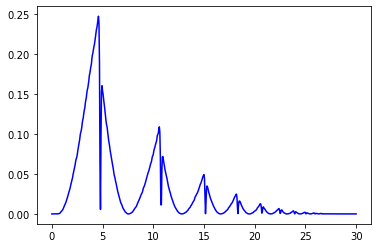

In [42]:
plt.plot(data["Latest: Time (s)"], data["Kinetic Energy (J): 1/2mv^2"], color="blue")
plt.show()

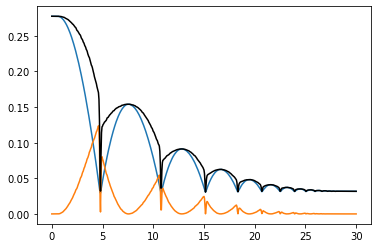

In [45]:
# create the graph
# assign coordinates
x1 = data["Latest: Time (s)"]
y1 = data["Potential Energy (J)"]
x2 = data["Latest: Time (s)"]
y2 = data["Kinetic Energy (J): 1/2mv^2"]
x3 = data["Latest: Time (s)"]
y3 = data["Total Energy(J)"]
plt.plot(x1, y1, x2, y2)
plt.plot(x3, y3, color="black")
plt.show()


In [7]:
# need both on sam graph along with a line representing the sum of both datasets
# as a function of time
